In [1]:
#LOAN APPROVAL PREDICTION
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [20]:
#read dataset into program
df = pd.read_csv(r"C:\Users\HomePC\Desktop\envoypathways\loan_approval_dataset.csv")
print(df.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [21]:
#convert  cartegorical feautur to numeric 
le = LabelEncoder()
for col in df.select_dtypes(include=[object]).columns:
    df[col] = le.fit_transform(df[col])

In [22]:
df.columns = df.columns.str.strip().str.lower()  # lowercase all
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [23]:
#seprate dataset into variable
X = df.drop("loan_status", axis=1)  # use the exact column name
y = df["loan_status"]



In [24]:
#adress imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: loan_status
0    25
1    24
Name: count, dtype: int64
After SMOTE: loan_status
0    25
1    25
Name: count, dtype: int64


In [25]:
#Split into train 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [27]:
#Train models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [28]:
#Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [29]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



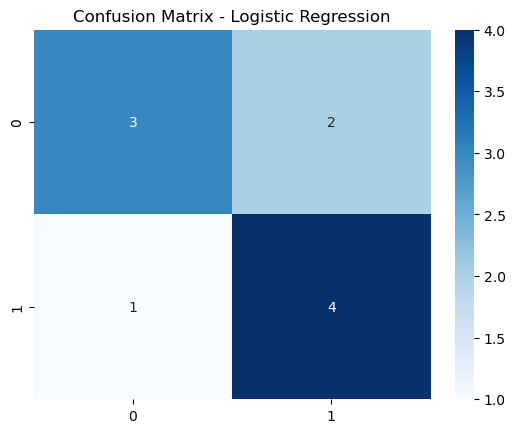

In [33]:
#confusion matrix for logistic regression
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

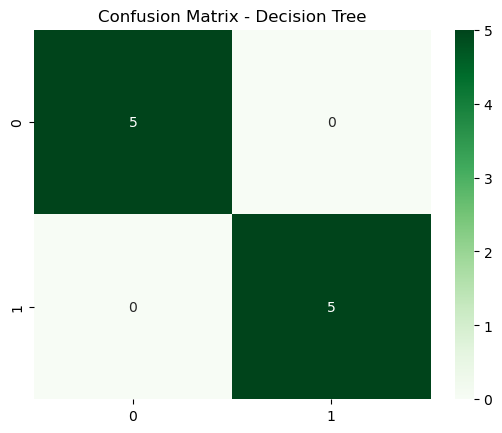

In [32]:
#confusion matrix for decision tree
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

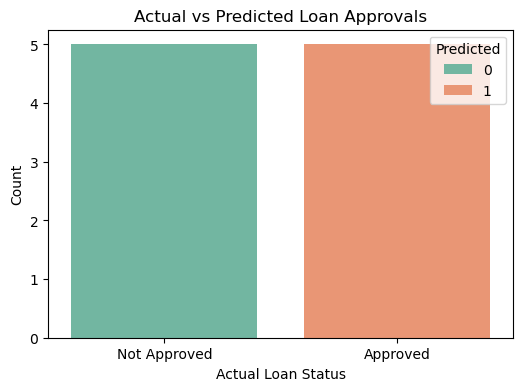

In [35]:
#  Prediction vs Actual Comparison (bar plot)-decision tree
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_tree})

plt.figure(figsize=(6,4))
sns.countplot(data=comparison, x="Actual", hue="Predicted", palette="Set2")
plt.title("Actual vs Predicted Loan Approvals")
plt.xlabel("Actual Loan Status")
plt.ylabel("Count")
plt.xticks([0,1], ["Not Approved", "Approved"])
plt.show()

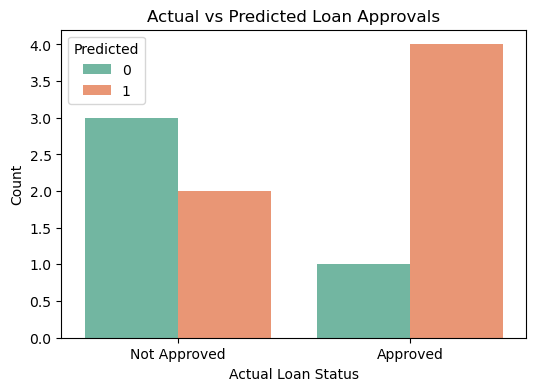

In [36]:
#  Prediction vs Actual Comparison (bar plot)-logistic regression
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_log})

plt.figure(figsize=(6,4))
sns.countplot(data=comparison, x="Actual", hue="Predicted", palette="Set2")
plt.title("Actual vs Predicted Loan Approvals")
plt.xlabel("Actual Loan Status")
plt.ylabel("Count")
plt.xticks([0,1], ["Not Approved", "Approved"])
plt.show()

Logistic Regression Accuracy: 0.70
Decision Tree Accuracy: 1.00


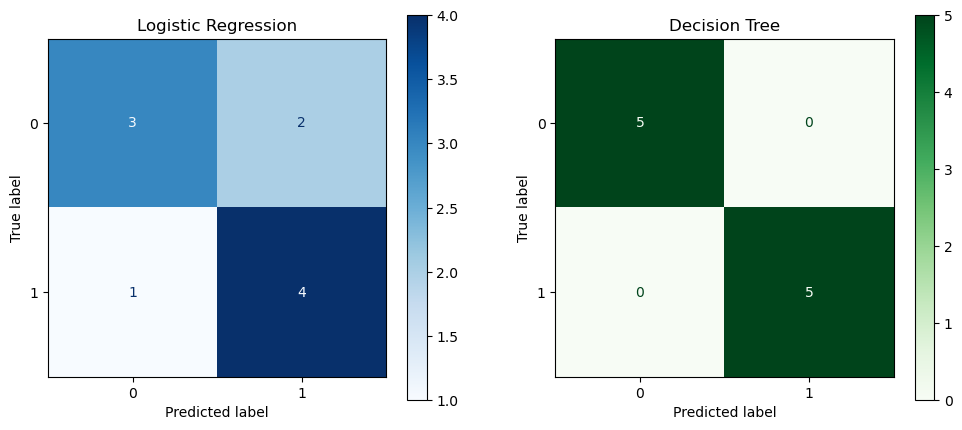

In [40]:
#  Compare Accuracy of logistic regression and decision tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)

print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(f"Decision Tree Accuracy: {acc_tree:.2f}")

#  Plot Confusion Matrices Side by Side 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[1], cmap="Greens")
axes[1].set_title("Decision Tree")

plt.show()